# Simulating Networks

In [77]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
# Import NetworkX
import networkx as nx
import numpy as np

In [78]:
#to handle stats error in learning step
from statistics import mode
from statistics import StatisticsError

## Agent-Based Models

In [79]:
G_karate = nx.karate_club_graph()

In [80]:
def initial_beliefs(G, p1):
    """Generate an initial beliefs for each node in G.
    The number of bits is determined by len(p1). If there are 5 bits, p1 should have 5 elements.

    # Params
    G: A graph
    p1: an array of real numbers between 0 and 1. p1[i] is the probability that bit i of the belief is 1.

    # Return
    A dict mapping nodes in G to lists of length len(p1).
    """
    #determine the num of bits
    start = 1
    end = random.randint(1,8)
    p1 = range(start, end + 1)
    num_bits = len(p1) #do we want to ask for the num of bits eventually
    
    beliefs = {}
    #assings list of num_bits to each node v
    for v in G.nodes():
        list_bits = []
        val = np.random.uniform(low=0, high=1, size = num_bits)
        for i in val:
            if i <= .30:
                list_bits.append(0)
            else:
                list_bits.append(1)
        beliefs[v] = list_bits
    return beliefs

In [93]:
#initial_beliefs(G_karate, p1)

In [82]:
def find_neighbor_mode(G, v, beliefs):
    '''Find the most common belief of node v's neighbors.
    
    # Params
    G: a Graph
    v: a node in G
    beliefs: a dict mapping nodes of G to 1 or 0
    
    # Return value
    The most common belief among v and its neighbors or beliefs[v] if there is a tie.
    '''
    neighbors_values = [] # list to keep values of neighbors
    for w in G.neighbors(v):
        neighbors_values.append(beliefs[w])        
    try:
        popular_val = mode(neighbors_values)
    except StatisticsError: 
        popular_val = beliefs[v]
    return popular_val

In [83]:
#find_neighbor_mode(G_karate, v, beliefs)

In [84]:
#Update each v value. Take the most common value among neighbors 
def learning_step(G, beliefs):
    '''decleare an empty dict to hold the new belief values'''
    new_beliefs = {}
    for v in G.nodes():
        #call function 
        new_beliefs[v] = find_neighbor_mode(G, v, beliefs)
    return new_beliefs

In [85]:
#learning_step(G_karate, initial_beliefs(G_karate))

In [86]:
#initial_beliefs(G_karate)

In [87]:
def plot_beliefs(G, ini_beliefs, true_value=0, steps=10):
    
    current_beliefs = dict(ini_beliefs) # variable in the argument
    beliefs = [current_beliefs]  
    #we will just plot the values. below the values are in a list
    x = dict((v, list()) for v in G.nodes())
    y = []
    #update the belief after each step
    for i in range(steps + 1):
        # 2. Set y[i] here by avereraging over current_belief values 
        list_values = [v for v in current_beliefs.values()]
        print(current_beliefs)
        y.append(sum(list_values) / len(list_values))
        for v in G.nodes():
            x[v].append(i) #add each step
        if i < steps:
            current_beliefs = learning_step(G, current_beliefs)
            beliefs.append(current_beliefs)
    #plot the change of belief over time
    plt.plot(y, 'y-', alpha=0.4, linewidth=2)
    print (y)
    #add spines to plot
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
    plt.xlim([0, steps]) 
    plt.ylim([0, 1])

{0: [1, 1, 1, 0, 1, 1], 1: [1, 0, 1, 1, 0, 1], 2: [1, 1, 1, 1, 1, 1], 3: [0, 1, 0, 1, 0, 1], 4: [1, 1, 0, 1, 1, 1], 5: [1, 1, 1, 1, 1, 1], 6: [1, 1, 0, 1, 0, 0], 7: [0, 0, 1, 1, 1, 1], 8: [0, 1, 1, 0, 1, 1], 9: [0, 0, 0, 1, 1, 0], 10: [1, 1, 1, 0, 1, 1], 11: [1, 0, 1, 1, 1, 1], 12: [1, 0, 1, 0, 1, 1], 13: [1, 1, 1, 1, 1, 0], 14: [0, 0, 1, 0, 1, 1], 15: [1, 0, 1, 1, 1, 0], 16: [0, 1, 0, 0, 1, 0], 17: [0, 0, 1, 1, 1, 1], 18: [0, 1, 1, 1, 1, 1], 19: [1, 1, 1, 1, 1, 1], 20: [0, 1, 0, 1, 0, 0], 21: [1, 1, 1, 0, 1, 0], 22: [1, 1, 1, 1, 1, 1], 23: [1, 1, 0, 1, 0, 1], 24: [1, 0, 0, 0, 1, 1], 25: [1, 0, 1, 1, 1, 1], 26: [1, 1, 1, 0, 1, 0], 27: [1, 0, 1, 1, 0, 1], 28: [1, 0, 1, 0, 1, 0], 29: [0, 0, 1, 1, 1, 1], 30: [1, 1, 1, 1, 0, 1], 31: [0, 1, 0, 0, 1, 0], 32: [1, 0, 1, 1, 1, 0], 33: [0, 1, 0, 0, 1, 0]}


TypeError: unsupported operand type(s) for +: 'int' and 'list'

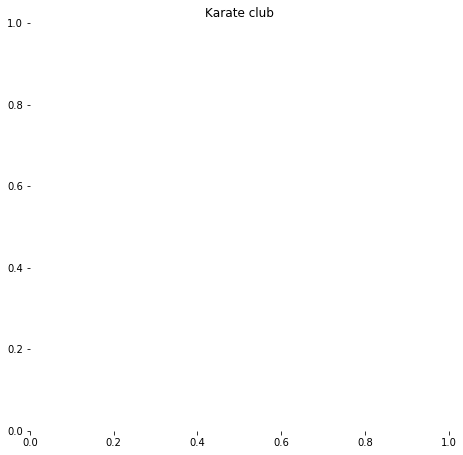

In [92]:
#in enumerate keep a count of iterations
plt.subplot(1, 1, 1)
plt.title("Karate club")
beliefs = initial_beliefs(G_karate, p1)
plot_beliefs(G_karate, beliefs, 1)
plt.tight_layout()

In [ ]:
#in enumerate keep a count of iterations
plt.subplot(1, 1, 1)
plt.title("SW")
G_SW = nx.watts_strogatz_graph(1000, 4, 0.001)
beliefs = initial_beliefs(G_SW)
plot_beliefs(G_SW, beliefs, steps = 20)
plt.tight_layout()

{'A': 0, 'B': 1, 'C': 1, 'D': 0, 'E': 1, 'F': 0, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 0, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
{'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 1, 'G': 1}
[0.5714285714285714, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


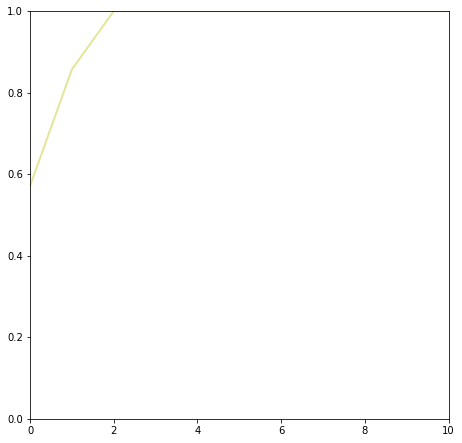

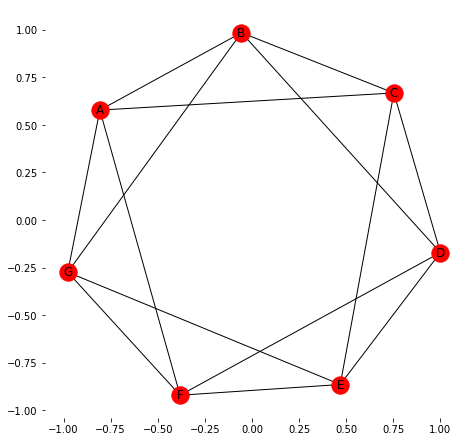

In [89]:
G = nx.Graph()
## Make graph 
G.add_edge('A', 'B')
G.add_edges_from([('B','C'),('C','D'),('D','E'),
                  ('E','F'),('F','G'),('G','A'),
                  ('A','C'),('A','F'),('B','G'),('B','D'),
                  ('C','E'),('D','F'),('E','G')])
beliefs = {}
beliefs['A'] = 0
beliefs['B'] = 1
beliefs['C'] = 1 
beliefs['D'] = 0
beliefs['E'] = 1
beliefs['F'] = 0
beliefs['G'] = 1

plot_beliefs(G, beliefs, steps = 10)

plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)


# Try && error

In [76]:
start = 1
end = random.randint(1,8)
p1 = range(start, end + 1)
num_bits = len(p1) #number of bits
print(p1)
print(num_bits)

range(1, 4)
3
